In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import ast # for converting strings ito tuples

# import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
from datetime import datetime

# Creating a datetime object
d = datetime.now()

# Converting a to string using strftime
datenow = d.strftime('%Y%m%d')
timenow = d.strftime("%H%M%S")

print(datenow)
print(timenow)

20240604
052251


# Data

## star_all_distances.csv

In [3]:
star = pd.read_csv("data_gen/trajectories/star_all_distances.csv", index_col=0)

print( 'Number of rows: \t{}\n'.format( len( star.ID.unique() )))
print( 'Columns:' )
for i, c in enumerate(star.columns):
    print('{}\t{}'.format(i, c))

print("\nCountries:")
print(star.location_country.value_counts())
print("\nDestination Neighborhoods:")
print(star.city_8.value_counts())
display(star)

Number of rows: 	1644

Columns:
0	ID
1	ID_ordered
2	location
3	dist
4	azimuth
5	lat
6	lon
7	location_type
8	max_dist_moves
9	grouping
10	location_l
11	location_near
12	location_country
13	city_8
14	neighborhood_9
15	orig_country_103
16	gender_4
17	employment_status_303
18	number_moves_200
19	work_kind_307
20	migrant_status_3
21	ethnic_group_106
22	mother_tongue_115
23	refugee_214
24	send_money_310
25	financial_support_320
26	retireOrigindist
27	retireOriginaz

Countries:
location_country
Ghana            5550
Kenya            4614
South Africa     4170
Nigeria           801
United States     600
                 ... 
Cuba                1
Mpumalanga          1
Tana River          1
Oman                1
Greece              1
Name: count, Length: 90, dtype: int64

Destination Neighborhoods:
city_8
Accra           7992
Nairobi         6142
Johannesburg    5785
Name: count, dtype: int64


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
0,276785,276785.00,"('Kisumu', 'Kisumu', 'Kenya')",245.805142,2.688263,34.754176,-0.102911,100,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
1,276785,276785.01,"('Manyatta', 'Kisumu', 'Kenya')",291.141195,2.607973,34.481394,0.333309,202,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
2,276785,276785.02,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,202,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
3,276785,276785.06,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,9,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
4,276788,276788.00,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,-3,-1,Yes,Luo,Swahili,-3,-1,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,297654,297654.00,"('Cosmo City', 'Randburg', 'South Africa')",20.811756,2.281284,27.930757,-26.021935,344,NaN,future,...,0,Working full-time (formal/informal sector),Yes,Mupedi,Sepedi,No,No,No,9.589894,0.658109
19915,297655,297655.00,"('Matola', 'Maputo', 'South Africa')",124.648052,0.248199,29.143194,-25.867549,344,NaN,future,...,2,Self-employed (run small business/income gener...,No,Copi,Portuguese,No,Yes,No,11.136970,0.000832
19916,297656,297656.00,"('Soweto', 'Johannesburg', 'South Africa')",18.535022,-2.924451,27.890000,-26.222778,344,NaN,future,...,0,Working full-time (formal/informal sector),Yes,Tsonga,Xitsonga,No,Yes,No,153.994931,0.151757
19917,297660,297660.00,"('Houghton', 'Johannesburg', 'South Africa')",1305.932037,-2.452768,18.733376,-34.022894,344,NaN,future,...,2,Working full-time (formal/informal sector),Yes,-3,Sotho,No,Yes,No,1287.397014,0.471683


In [4]:
"""
FILTER FOR ACCRA
"""
accra_star = star[star.city_8.eq('Accra')]
display(accra_star)

print("\nUnique IDs: {}".format(len( star.ID.unique() )))
print("\nLocations per ID")
for i, r in enumerate( star.ID.unique() ):
    subset_df = star[star.ID.eq(r)]
    print("{}\t{}\t{}".format(i,r,len(subset_df)))

print("\n================\n")
print("\nUnique Accra IDs: {}".format(len( accra_star.ID.unique() )))
print("\nLocations per Accra ID")
for i, r in enumerate( accra_star.ID.unique() ):
    subset_df = accra_star[accra_star.ID.eq(r)]
    print("{}\t{}\t{}".format(i,r,len(subset_df)))

,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
74,277933,277933.00,"('Madina', 'Adenta', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,100,0.000000,moves200,...,1,-3,Yes,Dangbe,Twi,No,No,No,NaN,NaN
75,277933,277933.06,"('Madina', 'Accra', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,9,0.000000,moves200,...,1,-3,Yes,Dangbe,Twi,No,No,No,NaN,NaN
76,278053,278053.00,"('Adenta', 'Adenta', 'Ghana')",1.967694,1.632161,-0.168796,5.704139,100,1.967694,moves200,...,1,-3,Yes,Dangme,Twi,No,Yes,No,NaN,NaN
77,278053,278053.06,"('Madina', 'Accra', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,9,1.967694,moves200,...,1,-3,Yes,Dangme,Twi,No,Yes,No,NaN,NaN
78,278067,278067.00,"('Adenta', 'Accra', 'Ghana')",1.967694,1.632161,-0.168796,5.704139,100,1.967694,moves200,...,3,-3,Yes,Ga,Twi,No,Yes,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19789,290677,290677.01,"('Mamprobi', 'Accra', 'Ghana')",2.450698,-2.499658,-0.240273,5.535686,344,NaN,future,...,2,Unemployed,Yes,Ga,Ga,No,No,Yes,2.639331,1.111316
19790,290678,290678.00,"('Sarpeiman', 'Accra', 'Ghana')",23.948632,2.053399,-0.310876,5.726363,344,NaN,future,...,3,Other (specify),No,Kru,Kru,Yes,No,No,851.908896,1.018085
19791,290680,290680.00,"('Lake Side', 'Accra', 'Ghana')",14.872774,-1.822760,-0.201238,5.557110,344,NaN,future,...,0,Self-employed (run small business/income gener...,Yes,Ewe,Ewe,No,Yes,No,14.872774,1.822760
19792,290682,290682.00,"('Oyibi', 'Accra', 'Ghana')",15.117568,1.224832,-0.121343,5.814253,344,NaN,future,...,1,University/technikon/correspondence student,Yes,Ewe,Ewe,No,No,Yes,4.942765,2.099944



Unique IDs: 1644

Locations per ID
0	276785	9
1	276788	2
2	276802	15
3	276814	9
4	276822	7
5	276931	7
6	276932	4
7	276934	10
8	276935	10
9	277079	6
10	277213	5
11	277290	19
12	277291	16
13	277321	18
14	277354	17
15	277372	16
16	277374	11
17	277415	16
18	277420	10
19	277424	7
20	277425	19
21	277426	13
22	277444	18
23	277446	19
24	277459	11
25	277462	14
26	277933	11
27	278053	7
28	278067	7
29	278075	12
30	278076	15
31	278077	16
32	278081	20
33	278084	8
34	278086	15
35	278087	13
36	278252	9
37	278253	10
38	278259	14
39	278260	12
40	278262	15
41	278267	12
42	278268	12
43	278269	5
44	278270	20
45	278276	17
46	278279	20
47	278295	21
48	278300	9
49	278309	8
50	278313	11
51	278314	10
52	278318	16
53	278321	8
54	278322	13
55	278323	15
56	278324	19
57	278326	22
58	278330	12
59	278340	10
60	278347	17
61	278348	18
62	278349	8
63	278358	7
64	278359	13
65	278360	17
66	278373	20
67	278377	9
68	278384	25
69	278385	25
70	278386	16
71	278387	14
72	278388	9
73	278391	6
74	278393	14
75	278394	25
76	27839

1374	290650	11
1375	290651	3
1376	290652	10
1377	290653	11
1378	290656	11
1379	290664	13
1380	290670	10
1381	290671	16
1382	290677	38
1383	290678	12
1384	290679	2
1385	290680	19
1386	290682	20
1387	290683	12
1388	290686	12
1389	290687	14
1390	290689	16
1391	291025	17
1392	291026	13
1393	291027	12
1394	291028	11
1395	291044	13
1396	291045	14
1397	291046	13
1398	291047	18
1399	291048	10
1400	291049	4
1401	291050	15
1402	291051	10
1403	291052	15
1404	291053	13
1405	292905	10
1406	292906	9
1407	292907	13
1408	292908	19
1409	292909	8
1410	292910	10
1411	292933	4
1412	292935	10
1413	292936	6
1414	292937	6
1415	292938	13
1416	292939	16
1417	292941	6
1418	292942	16
1419	292943	13
1420	292947	11
1421	292948	7
1422	292949	9
1423	292961	10
1424	292962	14
1425	292963	6
1426	292964	12
1427	292965	16
1428	292966	14
1429	293511	12
1430	293512	14
1431	293513	9
1432	293541	13
1433	293542	7
1434	293543	13
1435	293545	14
1436	293546	8
1437	293547	15
1438	293570	14
1439	293571	11
1440	293572	16
1441	29357

## Trajectories

In [8]:
traj_ = pd.read_csv("C:/Users/willy/python/mobilities-narratives/data_gen/trajectories/trajectories.csv")
traj = traj_.copy()

traj = traj.rename(columns={'Unnamed: 0':'IDo'}).set_index('IDo')
# traj = traj.dropna(subset=['duration', 'interval', 'location_name'], how='all')
display(traj)

orig = traj[traj['location_type'].eq('origin')].reset_index().set_index('respondentID')
display(orig)

curL = traj[traj['location_type'].eq('current location') & traj['interval'].eq(0.0)].reset_index().drop(columns=['Unnamed: 0']).set_index('respondentID')
display(curL)

,respondentID,birthyear,age,duration,interval,location_name,location_type,location_latlon,distance_from_origin_location_km,distance_from_previous_location_km,...,work_aspiration,financial_support,children,children_since_leaving,p_kmGeo,p_kmGrC,O_kmGeo,O_kmGrC,lat,lon
IDo,,,,,,,,,,,,,,,,,,,,,
276785.00,276785,1996,25,0.0,204.0,"('Kawango', 'Kisumu', 'Kenya')",origin,"(0.0, 31.983333000000002)",0.000000,0.000000,...,-3,NaN,No,-1,0.000000,0.000000,0.000000,0.000000,0.000000,31.983333
276785.01,276785,1996,25,204.0,48.0,"('Manyatta', 'Kisumu', 'Kenya')",1st migration location,"(0.33330859999999995, 34.4813935)",280.512936,280.512936,...,-3,NaN,No,-1,280.512936,280.232139,280.512936,280.232139,0.333309,34.481394
276785.02,276785,1996,25,252.0,51.0,"('Kawangware', 'Nairobi', 'Kenya')",2nd migration location,"(-1.2784631000000002, 36.751643)",549.265452,309.229771,...,-3,NaN,No,-1,309.229771,309.576982,549.265452,548.896968,-1.278463,36.751643
276785.03,276785,1996,25,NaN,NaN,NaN,3rd migration location,NaN,NaN,NaN,...,-3,NaN,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
276785.04,276785,1996,25,NaN,NaN,NaN,4th migration location,NaN,NaN,NaN,...,-3,NaN,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297668.06,297668,1991,30,380.0,16.0,"('Berea', 'Johannesburg', 'South Africa')",current location,"(-26.1822222, 28.0533333)",1254.648626,0.000000,...,Hr Specialist,2000.0,Yes,0,0.000000,0.000000,1254.648626,1255.233886,-26.182222,28.053333
297668.07,297668,1991,30,386.0,6.0,NaN,aspiration 2-6 months,NaN,NaN,NaN,...,Hr Specialist,2000.0,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN
297668.08,297668,1991,30,404.0,18.0,NaN,planned move 2 yrs,NaN,NaN,NaN,...,Hr Specialist,2000.0,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN


,IDo,birthyear,age,duration,interval,location_name,location_type,location_latlon,distance_from_origin_location_km,distance_from_previous_location_km,...,work_aspiration,financial_support,children,children_since_leaving,p_kmGeo,p_kmGrC,O_kmGeo,O_kmGrC,lat,lon
respondentID,,,,,,,,,,,,,,,,,,,,,
276785,276785.0,1996,25,0.0,204.0,"('Kawango', 'Kisumu', 'Kenya')",origin,"(0.0, 31.983333000000002)",0.0,0.0,...,-3,NaN,No,-1,0.0,0.0,0.0,0.0,0.000000,31.983333
276802,276802.0,1994,27,0.0,56.0,"('Machakos', 'Machakos', 'Kenya')",origin,"(-1.27900465, 37.39526976452546)",0.0,0.0,...,Accountant,3000.0,No,-1,0.0,0.0,0.0,0.0,-1.279005,37.395270
276814,276814.0,1988,33,0.0,300.0,"('Wathorego', 'Kisumu', 'Kenya')",origin,"(51.52066515, -0.14577657494447913)",0.0,0.0,...,-3,NaN,Yes,1,0.0,0.0,0.0,0.0,51.520665,-0.145777
276822,276822.0,1995,26,0.0,246.0,"('Kawango', 'Maseno', 'Kenya')",origin,"(0.0, 31.983333000000002)",0.0,0.0,...,Teaching,10000.0,No,-1,0.0,0.0,0.0,0.0,0.000000,31.983333
276931,276931.0,1988,33,0.0,301.0,"('Mamboleo', 'Kisumu', 'Kenya')",origin,"(-0.05541535, 34.78619684046177)",0.0,0.0,...,Teaching,500.0,Yes,2,0.0,0.0,0.0,0.0,-0.055415,34.786197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297657,297657.0,1978,43,0.0,650.0,"('Chingola', 'Chingola', 'Zambia')",origin,"(-12.5474926, 27.860042200000002)",0.0,0.0,...,He Said He Like Working With His Hands So He D...,500.0,No,-1,0.0,0.0,0.0,0.0,-12.547493,27.860042
297663,297663.0,1979,42,NaN,NaN,"('Sesambo', 'Sesambo', 'Uganda')",origin,NaN,NaN,NaN,...,Soldier,NaN,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN
297666,297666.0,1984,37,0.0,372.0,"('Lububamshi', 'Katsanga', 'Democratic Republi...",origin,"(-29.116395, 26.215496)",0.0,0.0,...,Psychologist,1500.0,Yes,0,0.0,0.0,0.0,0.0,-29.116395,26.215496


KeyError: "['Unnamed: 0'] not found in axis"

# Data Cleaning

## Check: Valid Geocoded Locations

In [9]:
"""
COUNTS OF LOCATION TYPES
"""
display( pd.Series( accra_star.location_near.value_counts()))
display( pd.Series( accra_star['location_type'].value_counts()))

location_near
Accra            2975
Kumasi            395
Tamale            358
Lagos             295
Koforidua         223
                 ... 
Cairo               1
Agbani              1
Odorkor             1
Ogbojo              1
Ashaley Botwe       1
Name: count, Length: 402, dtype: int64

location_type
134    703
142    662
406    624
225    602
9      586
100    569
311    418
715    394
344    381
202    335
713    300
701    279
717    272
219    261
705    208
340    175
321    173
342    161
703    152
712    151
206    137
516    127
343    125
152     91
707     45
211     45
214     14
215      2
Name: count, dtype: int64

In [10]:
"""
COUNTS OF LOCATION, COUNTY PAIRS
"""

accra_pairs = accra_star[accra_star.location_type.lt(300)][['location_near', 'location_country', 'ID']].groupby(['location_near', 'location_country']).count().reset_index().rename(columns={'ID':'count'}).sort_values('count', ascending=False)
display(accra_pairs)

# accra_pairs.to_csv('{}_AccraPairs.csv'.format(datenow))

,location_near,location_country,count
16,Accra,Ghana,1615
200,Kumasi,Ghana,224
318,Tamale,Ghana,180
190,Koforidua,Ghana,128
211,Lagos,Nigeria,125
...,...,...,...
166,Igbo State,Nigeria,1
167,Ikeja,Nigeria,1
168,Ikorodu,Nigeria,1
169,Ikotun,Nigeria,1


In [11]:
"""
COUNTS OF LOCATION, COUNTY PAIRS WITH TYPE
"""


accra_pairs_g = accra_star[accra_star.location_type.lt(300)][['location_near', 'location_country', 'grouping', 'ID']].groupby(['location_near', 'location_country', 'grouping']).count().reset_index().rename(columns={'ID':'count'}).sort_values('count', ascending=False)
display(accra_pairs_g)

# accra_pairs_g.to_csv('{}_AccraPairs_Groupings.csv'.format(datenow))

,location_near,location_country,grouping,count
31,Accra,Ghana,moves200,938
30,Accra,Ghana,household,314
28,Accra,Ghana,connections_ppl,264
504,Tamale,Ghana,household,114
29,Accra,Ghana,future,99
...,...,...,...,...
219,Epe,Nigeria,moves200,1
215,Elmina,Ghana,household,1
210,Eastern Region,Ghana,connections_ppl,1
209,East Legon,Ghana,future,1


In [13]:
"""
COUNTS OF LOCATION, COUNTY PAIRS THAT ARE INTERMEDIATE LOCATIONS
"""

accra_pairs_200 = accra_star[accra_star.grouping.eq('moves200')][['location_near', 'location_country', 'grouping', 'ID']].groupby(['location_near', 'location_country', 'grouping']).count().reset_index().rename(columns={'ID':'count'}).sort_values('count', ascending=False)
display(accra_pairs_200)

print(accra_pairs_200['count'].sum())
# accra_pairs_200.to_csv('{}_AccraPairs_Moves200.csv'.format(datenow))

,location_near,location_country,grouping,count
11,Accra,Ghana,moves200,938
111,Lagos,Nigeria,moves200,48
175,Tamale,Ghana,moves200,45
107,Kumasi,Ghana,moves200,41
100,Koforidua,Ghana,moves200,32
...,...,...,...,...
112,Lagos State,Nigeria,moves200,1
47,Berekum,Ghana,moves200,1
110,Labadi,Ghana,moves200,1
109,Kyebi,Ghana,moves200,1


1615


In [16]:
# how many unique IDS in moves200
print( len( accra_star[accra_star.grouping.eq('moves200')]['ID'].unique() ))

# per country
print( accra_pairs_200[accra_pairs_200.location_country.eq('Ghana')]['count'].sum() )

581
1336


# Spread Generation

In [14]:
# DATA NAVIGATION

display(accra_star)

print(accra_star['location_type'].unique())

print('\n')

for i, c in enumerate(accra_star.columns):
    print('{}\t{}'.format(i,c))
    
print('\n')

for i, c in enumerate(accra_star.columns):
    print("'{}',".format(c))

,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
74,277933,277933.00,"('Madina', 'Adenta', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,100,0.000000,moves200,...,1,-3,Yes,Dangbe,Twi,No,No,No,NaN,NaN
75,277933,277933.06,"('Madina', 'Accra', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,9,0.000000,moves200,...,1,-3,Yes,Dangbe,Twi,No,No,No,NaN,NaN
76,278053,278053.00,"('Adenta', 'Adenta', 'Ghana')",1.967694,1.632161,-0.168796,5.704139,100,1.967694,moves200,...,1,-3,Yes,Dangme,Twi,No,Yes,No,NaN,NaN
77,278053,278053.06,"('Madina', 'Accra', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,9,1.967694,moves200,...,1,-3,Yes,Dangme,Twi,No,Yes,No,NaN,NaN
78,278067,278067.00,"('Adenta', 'Accra', 'Ghana')",1.967694,1.632161,-0.168796,5.704139,100,1.967694,moves200,...,3,-3,Yes,Ga,Twi,No,Yes,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19789,290677,290677.01,"('Mamprobi', 'Accra', 'Ghana')",2.450698,-2.499658,-0.240273,5.535686,344,NaN,future,...,2,Unemployed,Yes,Ga,Ga,No,No,Yes,2.639331,1.111316
19790,290678,290678.00,"('Sarpeiman', 'Accra', 'Ghana')",23.948632,2.053399,-0.310876,5.726363,344,NaN,future,...,3,Other (specify),No,Kru,Kru,Yes,No,No,851.908896,1.018085
19791,290680,290680.00,"('Lake Side', 'Accra', 'Ghana')",14.872774,-1.822760,-0.201238,5.557110,344,NaN,future,...,0,Self-employed (run small business/income gener...,Yes,Ewe,Ewe,No,Yes,No,14.872774,1.822760
19792,290682,290682.00,"('Oyibi', 'Accra', 'Ghana')",15.117568,1.224832,-0.121343,5.814253,344,NaN,future,...,1,University/technikon/correspondence student,Yes,Ewe,Ewe,No,No,Yes,4.942765,2.099944


[100   9 202 206 211 214 215 152 142 134 225 406 516 311 321 343 342 340
 701 703 705 707 219 712 713 715 717 344]


0	ID
1	ID_ordered
2	location
3	dist
4	azimuth
5	lat
6	lon
7	location_type
8	max_dist_moves
9	grouping
10	location_l
11	location_near
12	location_country
13	city_8
14	neighborhood_9
15	orig_country_103
16	gender_4
17	employment_status_303
18	number_moves_200
19	work_kind_307
20	migrant_status_3
21	ethnic_group_106
22	mother_tongue_115
23	refugee_214
24	send_money_310
25	financial_support_320
26	retireOrigindist
27	retireOriginaz


'ID',
'ID_ordered',
'location',
'dist',
'azimuth',
'lat',
'lon',
'location_type',
'max_dist_moves',
'grouping',
'location_l',
'location_near',
'location_country',
'city_8',
'neighborhood_9',
'orig_country_103',
'gender_4',
'employment_status_303',
'number_moves_200',
'work_kind_307',
'migrant_status_3',
'ethnic_group_106',
'mother_tongue_115',
'refugee_214',
'send_money_310',
'financial_support_320',
'retireOrigindist',
'retireOriginaz',


In [21]:
accra_star['location_type'].value_counts()

location_type
134    703
142    662
406    624
225    602
9      586
100    569
311    418
715    394
344    381
202    335
713    300
701    279
717    272
219    261
705    208
340    175
321    173
342    161
703    152
712    151
206    137
516    127
343    125
152     91
707     45
211     45
214     14
215      2
Name: count, dtype: int64

## Spread Table Components

### Direct Relations

In [22]:
# DIRECT (PER 23.10.27 DOC)
# Columns 238 and 401 appear not to be in star

print('Places Returned To')
display(accra_star[accra_star.location_type.eq(238)])

print('Interaction Outside of the City')
display(accra_star[accra_star.location_type.eq(401)])
display(accra_star[accra_star.location_type.eq(406)])

Places Returned To


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz


Interaction Outside of the City


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
9363,277933,277933.00,"('Alajo', 'Accra', 'Ghana')",10.773584,-2.043552,-0.212070,5.600330,406,NaN,connections_ppl,...,1,-3,Yes,Dangbe,Twi,No,No,No,NaN,NaN
9364,278053,278053.00,"('Kuntunse', 'Kumasi', 'Ghana')",196.400883,2.531191,-1.623040,6.698081,406,NaN,connections_ppl,...,1,-3,Yes,Dangme,Twi,No,Yes,No,NaN,NaN
9365,278067,278067.00,"('Madina', 'Accra', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,406,NaN,connections_ppl,...,3,-3,Yes,Ga,Twi,No,Yes,No,NaN,NaN
9366,278076,278076.00,"('Mason', 'Obuasi', 'Ghana')",178.120569,2.807372,-1.689404,6.211542,406,NaN,connections_ppl,...,2,Working full-time (formal/informal sector),Yes,Akantwi,Twi Twi,No,Yes,No,19.776593,0.300033
9367,278077,278077.00,"('Kumasi', 'nan', 'Ghana')",196.400883,2.531191,-1.623040,6.698081,406,NaN,connections_ppl,...,1,Working full-time (formal/informal sector),Yes,Akan,Twitwi,No,Yes,No,9.662127,0.050407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10696,290677,290677.00,"('James Town', 'Accra', 'Ghana')",1.980979,-0.824902,-0.210364,5.535797,406,NaN,connections_ppl,...,2,Unemployed,Yes,Ga,Ga,No,No,Yes,2.639331,1.111316
10697,290682,290682.00,"('Ogbodjo', 'Accra', 'Ghana')",14.872774,-1.822760,-0.201238,5.557110,406,NaN,connections_ppl,...,1,University/technikon/correspondence student,Yes,Ewe,Ewe,No,No,Yes,4.942765,2.099944
10698,290683,290683.00,"('Abuja', 'Abuja', 'Nigeria')",937.833044,0.427928,7.489297,9.064331,406,NaN,connections_ppl,...,2,Self-employed (run small business/income gener...,No,Bassa,Bassa,No,Yes,Yes,NaN,NaN
10699,290683,290683.01,"('Ikeja', 'Lagos', 'Nigeria')",412.474459,0.288685,3.353204,6.604859,406,NaN,connections_ppl,...,2,Self-employed (run small business/income gener...,No,Bassa,Bassa,No,Yes,Yes,NaN,NaN


<Axes: >

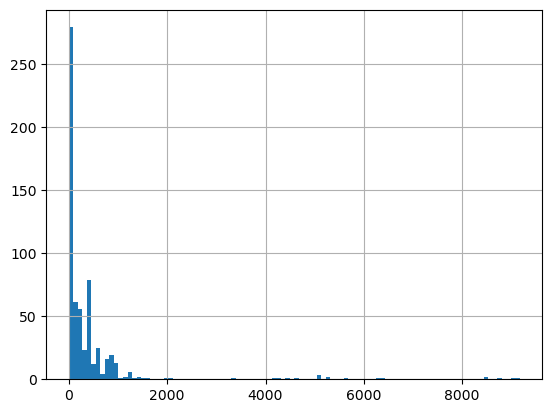

In [17]:
# VISUALIZE DIRECT RELATIONS

dr_accra = accra_star[accra_star.location_type.eq(406)].sort_values('dist', ascending=False).reset_index(drop=True)
# dr_accra.to_csv('accraspread_col406.csv')
dr_accra['dist'].hist(bins=100)

### Indirect Relations

In [23]:
# INDIRECT (PER 23.10.27 DOC)

print('\nRelations')
display(accra_star[accra_star.location_type.eq(225)])

print('\nSupport')
display(accra_star[accra_star.location_type.eq(311)])
display(accra_star[accra_star.location_type.eq(321)])

print('\nInvestments')
display(accra_star[accra_star.location_type.eq(340)])

print('\nObligations')
display(accra_star[accra_star.location_type.eq(341)])

print('\nProperty Outside')
display(accra_star[accra_star.location_type.eq(343)])


Relations


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
8174,277933,277933.00,"('Pankrono', 'Kumasi', 'Ghana')",198.191794,2.507671,-1.611735,6.741339,225,NaN,connections_ppl,...,1,-3,Yes,Dangbe,Twi,No,No,No,NaN,NaN
8175,277933,277933.01,"('Mayara', 'Accra', 'Ghana')",368.641483,2.425705,-2.682405,7.861509,225,NaN,connections_ppl,...,1,-3,Yes,Dangbe,Twi,No,No,No,NaN,NaN
8176,278053,278053.00,"('Tema', 'Accra', 'Ghana')",17.729620,-0.169406,-0.009659,5.659644,225,NaN,connections_ppl,...,1,-3,Yes,Dangme,Twi,No,Yes,No,NaN,NaN
8177,278067,278067.00,"('Takoradi', 'Sekondi', 'Ghana')",196.460290,-2.671874,-1.751932,4.887401,225,NaN,connections_ppl,...,3,-3,Yes,Ga,Twi,No,Yes,No,NaN,NaN
8178,278077,278077.00,"('Sunyani', 'nan', 'Ghana')",301.682499,2.486539,-2.330923,7.338439,225,NaN,connections_ppl,...,1,Working full-time (formal/informal sector),Yes,Akan,Twitwi,No,Yes,No,9.662127,0.050407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,290683,290683.01,"('Abuja', 'Abuja', 'Nigeria')",937.833044,0.427928,7.489297,9.064331,225,NaN,connections_ppl,...,2,Self-employed (run small business/income gener...,No,Bassa,Bassa,No,Yes,Yes,NaN,NaN
9248,290683,290683.02,"('London', 'London', 'United Kingdom')",5116.056858,1.570154,-0.127647,51.507322,225,NaN,connections_ppl,...,2,Self-employed (run small business/income gener...,No,Bassa,Bassa,No,Yes,Yes,NaN,NaN
9249,290687,290687.00,"('Kumasi', 'Kumasi', 'Ghana')",196.400883,2.531191,-1.623040,6.698081,225,NaN,connections_ppl,...,1,Casual employment/temporary worker,Yes,Frafra,Hausa,No,Yes,No,24.298281,2.515624
9250,290687,290687.01,"('Cape Coast', 'Cape Coast', 'Ghana')",135.252807,-2.644940,-1.243079,5.107467,225,NaN,connections_ppl,...,1,Casual employment/temporary worker,Yes,Frafra,Hausa,No,Yes,No,24.298281,2.515624



Support


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
11307,278053,278053.00,"('Kuntunse', 'Kumasi', 'Ghana')",196.400883,2.531191,-1.623040,6.698081,311,NaN,connections_fin,...,1,-3,Yes,Dangme,Twi,No,Yes,No,NaN,NaN
11308,278067,278067.00,"('Adenta', 'Oyibi', 'Ghana')",1.967694,1.632161,-0.168796,5.704139,311,NaN,connections_fin,...,3,-3,Yes,Ga,Twi,No,Yes,No,NaN,NaN
11310,278076,278076.00,"('Mason', 'Obuasi', 'Ghana')",178.120569,2.807372,-1.689404,6.211542,311,NaN,connections_fin,...,2,Working full-time (formal/informal sector),Yes,Akantwi,Twi Twi,No,Yes,No,19.776593,0.300033
11311,278077,278077.00,"('Kumasi', 'nan', 'Ghana')",196.400883,2.531191,-1.623040,6.698081,311,NaN,connections_fin,...,1,Working full-time (formal/informal sector),Yes,Akan,Twitwi,No,Yes,No,9.662127,0.050407
11312,278077,278077.00,"('Kumasi', 'nan', 'Ghana')",196.400883,2.531191,-1.623040,6.698081,311,NaN,connections_fin,...,1,Working full-time (formal/informal sector),Yes,Akan,Twitwi,No,Yes,No,9.662127,0.050407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12178,290664,290664.01,"('Kwamannor', 'Accra', 'Ghana')",14.872774,-1.822760,-0.201238,5.557110,311,NaN,connections_fin,...,3,Casual employment/temporary worker,Yes,Twi,Twi,No,Yes,Yes,NaN,NaN
12179,290670,290670.00,"('Ejigbo', 'Lagos', 'Nigeria')",405.855226,0.278081,3.306722,6.550723,311,NaN,connections_fin,...,2,Self-employed (run small business/income gener...,No,Igbo,Igbo,No,Yes,No,NaN,NaN
12180,290680,290680.00,"('Aflao', 'Ho', 'Ghana')",157.705560,0.308017,1.191402,6.116047,311,NaN,connections_fin,...,0,Self-employed (run small business/income gener...,Yes,Ewe,Ewe,No,Yes,No,14.872774,1.822760
12181,290683,290683.00,"('Ikeja', 'Lagos', 'Nigeria')",412.474459,0.288685,3.353204,6.604859,311,NaN,connections_fin,...,2,Self-employed (run small business/income gener...,No,Bassa,Bassa,No,Yes,Yes,NaN,NaN


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
12324,278386,278386.00,"('Koforidua', 'Sefwi', 'Ghana')",47.219867,1.792150,-0.261457,6.100334,321,NaN,connections_fin,...,4,Working full-time (formal/informal sector),Yes,Kwahu,Twi,No,Yes,Yes,NaN,NaN
12325,278387,278387.00,"('Teshie', 'Accra', 'Ghana')",13.062081,-1.094183,-0.113510,5.582234,321,NaN,connections_fin,...,3,Working full-time (formal/informal sector),Yes,Ga,Ga,No,Yes,Yes,NaN,NaN
12326,278387,278387.01,"('Kumasi', 'Accra', 'Ghana')",196.400883,2.531191,-1.623040,6.698081,321,NaN,connections_fin,...,3,Working full-time (formal/informal sector),Yes,Ga,Ga,No,Yes,Yes,NaN,NaN
12327,278388,278388.00,"('Adenta', 'Accra', 'Ghana')",1.967694,1.632161,-0.168796,5.704139,321,NaN,connections_fin,...,1,Unemployed,No,Ewe,Ewe,No,No,Yes,NaN,NaN
12353,279637,279637.00,"('Kumasi', 'Kumasi', 'Ghana')",196.400883,2.531191,-1.623040,6.698081,321,NaN,connections_fin,...,-3,Unemployed,Yes,Banda,Hausa,No,Yes,Yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,290682,290682.00,"('Ogbodjo', 'Accra', 'Ghana')",14.872774,-1.822760,-0.201238,5.557110,321,NaN,connections_fin,...,1,University/technikon/correspondence student,Yes,Ewe,Ewe,No,No,Yes,4.942765,2.099944
12667,290683,290683.00,"('London', 'London', 'United Kingdom')",5116.056858,1.570154,-0.127647,51.507322,321,NaN,connections_fin,...,2,Self-employed (run small business/income gener...,No,Bassa,Bassa,No,Yes,Yes,NaN,NaN
12668,290686,290686.00,"('Pennsylvania', 'Pennsylvania', 'United States')",8867.962819,3.016016,-77.727883,40.969989,321,NaN,connections_fin,...,0,Self-employed (run small business/income gener...,Yes,Akuapim,Akuapim Twi,No,No,Yes,1.967694,1.632161
12669,290689,290689.00,"('Toronto', 'Toronto', 'Canada')",9051.109361,3.026275,-79.383935,43.653482,321,NaN,connections_fin,...,0,Working full-time (formal/informal sector),Yes,Akan,Fanti,No,No,Yes,15.117568,1.224832



Investments


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
13441,277933,277933.00,"('Legon', 'Accra', 'Ghana')",4.942765,-2.099944,-0.190270,5.648167,340,NaN,connections_fin,...,1,-3,Yes,Dangbe,Twi,No,No,No,NaN,NaN
13442,278053,278053.00,"('Tema', 'Accra', 'Ghana')",17.729620,-0.169406,-0.009659,5.659644,340,NaN,connections_fin,...,1,-3,Yes,Dangme,Twi,No,Yes,No,NaN,NaN
13443,278076,278076.00,"('Adenta', 'Accra', 'Ghana')",1.967694,1.632161,-0.168796,5.704139,340,NaN,connections_fin,...,2,Working full-time (formal/informal sector),Yes,Akantwi,Twi Twi,No,Yes,No,19.776593,0.300033
13444,278081,278081.00,"('Surulere', 'Lagos', 'Nigeria')",399.394456,0.224822,3.353259,6.487201,340,NaN,connections_fin,...,1,Other (specify),No,Igbo,Igbo,No,Yes,No,0.000000,0.000000
13445,278084,278084.00,"('Kasoa', 'Accra', 'Ghana')",34.402017,-2.620234,-0.437491,5.532573,340,NaN,connections_fin,...,0,-3,Yes,Ewe,Twi,No,No,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,290648,290648.00,"('Madina', 'Accra', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,340,NaN,connections_fin,...,2,Casual employment/temporary worker,Yes,Ewe,Ewe,No,Yes,Yes,15.572433,1.926840
13928,290648,290648.01,"('Prampram', 'Accra', 'Ghana')",30.445207,0.104080,0.106142,5.714910,340,NaN,connections_fin,...,2,Casual employment/temporary worker,Yes,Ewe,Ewe,No,Yes,Yes,15.572433,1.926840
13929,290656,290656.00,"('Adabraka', 'Accra', 'Ghana')",3.413104,1.528951,-0.209072,5.566430,340,NaN,connections_fin,...,3,Self-employed (run small business/income gener...,Yes,Ga,Ga,No,No,No,1.842561,0.259998
13930,290677,290677.00,"('James Town', 'Accra', 'Ghana')",1.980979,-0.824902,-0.210364,5.535797,340,NaN,connections_fin,...,2,Unemployed,Yes,Ga,Ga,No,No,Yes,0.545021,1.196645



Obligations


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz



Property Outside


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
12713,278084,278084.0,"('Kasoa', 'Accra', 'Ghana')",34.402017,-2.620234,-0.437491,5.532573,343,NaN,connections_fin,...,0,-3,Yes,Ewe,Twi,No,No,No,NaN,NaN
12714,278086,278086.0,"('Pantang', 'Medina', 'Ghana')",3.627578,1.705986,-0.172127,5.718786,343,NaN,connections_fin,...,1,-3,Yes,Akan,NaN,No,Yes,No,43.592289,0.086164
12744,281972,281972.0,"('Fante Newtown', 'Asarfo', 'Ghana')",179.688094,-2.736393,-1.661113,5.049994,343,NaN,connections_fin,...,1,Working full-time (formal/informal sector),Yes,Akan,Twi,No,No,Yes,15.616314,5.267437
12746,281997,281997.0,"('Oyibi', 'Accra', 'Ghana')",15.117568,1.224832,-0.121343,5.814253,343,NaN,connections_fin,...,3,Other (specify),Yes,Akan,Twi Tw,No,Yes,No,NaN,NaN
12747,282036,282036.0,"('Anloga', 'Keta', 'Ghana')",118.493514,0.100829,0.898470,5.793648,343,NaN,connections_fin,...,2,Working full-time (formal/informal sector),Yes,Ewe,Ewe,No,Yes,Yes,12.282270,0.100614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,290650,290650.0,"('Peace Town', 'Accra', 'Ghana')",2.578224,1.168647,-0.201238,5.557110,343,NaN,connections_fin,...,4,Other (specify),No,Zabarma,Zabarma,No,Yes,No,4.000739,0.040581
12932,290656,290656.0,"('Pokuase', 'Accra', 'Ghana')",18.855353,2.008471,-0.282636,5.689213,343,NaN,connections_fin,...,3,Self-employed (run small business/income gener...,Yes,Ga,Ga,No,No,No,1.842561,0.259998
12933,290671,290671.0,"('Ashaley Botwe', 'Accra', 'Ghana')",3.400859,-0.001457,-0.136949,5.686452,343,NaN,connections_fin,...,3,Unemployed,Yes,Akuapem,Akuapem,No,No,No,11.471915,1.821303
12934,290678,290678.0,"('Sarpeiman', 'Accra', 'Ghana')",23.948632,2.053399,-0.310876,5.726363,343,NaN,connections_fin,...,3,Other (specify),No,Kru,Kru,Yes,No,No,851.908896,1.018085


In [24]:
"""
COLUMNS FOR INDIRECT RELATIONS
"""

types = [340, 311, 321, 343, 225] # Indirect Relations
# [406] # Direct Relations

ir_accra = accra_star[accra_star.location_type.isin(types)]
display(ir_accra)

,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
8174,277933,277933.00,"('Pankrono', 'Kumasi', 'Ghana')",198.191794,2.507671,-1.611735,6.741339,225,NaN,connections_ppl,...,1,-3,Yes,Dangbe,Twi,No,No,No,NaN,NaN
8175,277933,277933.01,"('Mayara', 'Accra', 'Ghana')",368.641483,2.425705,-2.682405,7.861509,225,NaN,connections_ppl,...,1,-3,Yes,Dangbe,Twi,No,No,No,NaN,NaN
8176,278053,278053.00,"('Tema', 'Accra', 'Ghana')",17.729620,-0.169406,-0.009659,5.659644,225,NaN,connections_ppl,...,1,-3,Yes,Dangme,Twi,No,Yes,No,NaN,NaN
8177,278067,278067.00,"('Takoradi', 'Sekondi', 'Ghana')",196.460290,-2.671874,-1.751932,4.887401,225,NaN,connections_ppl,...,3,-3,Yes,Ga,Twi,No,Yes,No,NaN,NaN
8178,278077,278077.00,"('Sunyani', 'nan', 'Ghana')",301.682499,2.486539,-2.330923,7.338439,225,NaN,connections_ppl,...,1,Working full-time (formal/informal sector),Yes,Akan,Twitwi,No,Yes,No,9.662127,0.050407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,290648,290648.00,"('Madina', 'Accra', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,340,NaN,connections_fin,...,2,Casual employment/temporary worker,Yes,Ewe,Ewe,No,Yes,Yes,15.572433,1.926840
13928,290648,290648.01,"('Prampram', 'Accra', 'Ghana')",30.445207,0.104080,0.106142,5.714910,340,NaN,connections_fin,...,2,Casual employment/temporary worker,Yes,Ewe,Ewe,No,Yes,Yes,15.572433,1.926840
13929,290656,290656.00,"('Adabraka', 'Accra', 'Ghana')",3.413104,1.528951,-0.209072,5.566430,340,NaN,connections_fin,...,3,Self-employed (run small business/income gener...,Yes,Ga,Ga,No,No,No,1.842561,0.259998
13930,290677,290677.00,"('James Town', 'Accra', 'Ghana')",1.980979,-0.824902,-0.210364,5.535797,340,NaN,connections_fin,...,2,Unemployed,Yes,Ga,Ga,No,No,Yes,0.545021,1.196645


### Index Number for Survey Colums with Multiple locations

In [25]:
"""
FIND SURVEY COLUMNS WITH MULTIPLE LOCATIONS FOR A SINGLE RESPONDENT
"""

column_counts = ir_accra[['ID', 'location_type', 'location']].groupby(['ID', 'location_type']).count().sort_values('location', ascending=False).reset_index()
column_counts = column_counts[column_counts.location>1]
column_counts

,ID,location_type,location
0,289855,225,8
1,288590,225,8
2,289901,225,8
3,289543,225,6
4,284588,225,6
...,...,...,...
297,283533,225,2
298,283592,311,2
299,278081,225,2
300,284503,225,2


In [26]:
"""
NEW COLUMN TO FACTOR IN MULTIPLE LOCATIONS FOR A SINGLE SURVEY COLUMN
"""
# Necessary for .pivot_table() to work
# Format: {column num}_{index num}

# Source:
# https://stackoverflow.com/questions/63459330/add-index-to-duplicated-items-in-pandas-series
# https://datascience.stackexchange.com/questions/114282/turn-duplicate-rows-in-pandas-dataframe-into-new-columns-in-the-same-dataframe

# Create combination of ID and location type
df = ir_accra.copy()
df['combo'] = df['ID'].astype('str') + ' ' + df['location_type'].astype('str')

# Create a unique index for duplicate combination
mylist = list(df['combo'])
# m = map(lambda x: x[1]+ " " + str(mylist[:x[0]].count(x[1]) + 1) if mylist.count(x[1]) > 1 else x[1], enumerate(mylist))
m = map(lambda x: str(mylist[:x[0]].count(x[1]) + 1) if mylist.count(x[1]) > 1 else 1, enumerate(mylist))
m = list(m)
#s = pd.Series(m)
#s

# New column with new column names
ir_accra['n_location_type'] = m
ir_accra['location_type_n'] = ir_accra['location_type'].astype('str') + '_' + ir_accra['n_location_type'].astype('str')
# ir_accra['location_type_n'] = np.where(ir_accra['n_location_type'].astype('int64').gt(0), 
#                                                        ir_accra['location_type_n'],
#                                                        ir_accra['location_type'])
display(ir_accra[['ID', 'location_type', 'n_location_type', 'location_type_n']].sort_values('ID'))

,ID,location_type,n_location_type,location_type_n
8174,277933,225,1,225_1
8175,277933,225,2,225_2
13441,277933,340,1,340_1
13442,278053,340,1,340_1
11307,278053,311,1,311_1
...,...,...,...,...
9249,290687,225,1,225_1
12182,290687,311,1,311_1
9250,290687,225,2,225_2
12669,290689,321,1,321_1


In [27]:
# NEW COLUMNS LIST

ir_cols = ir_accra['location_type_n'].unique()
print(ir_cols)

['225_1' '225_2' '225_3' '225_4' '225_5' '225_6' '225_7' '225_8' '311_1'
 '311_2' '311_3' '311_4' '311_5' '311_6' '321_1' '321_2' '321_3' '321_4'
 '343_1' '343_2' '343_3' '340_1' '340_2' '340_3' '340_4']


### Values to include in Spread Table

In [28]:
"""
TABLES PER RESPONDENT ID
"""

# 1. Sum of distances
spread_dist = ir_accra[['ID', 'dist']].groupby('ID').sum().sort_values('dist', ascending=False).rename(columns={'dist':'total_spread'}).reset_index()
display(spread_dist)

# 2. Tuples
# spread_tups = ir_accra[['ID', 'location_type', 'location']].pivot_table(index='ID',  columns='location_type', aggfunc='first', dropna=False)
spread_tups = ir_accra[['ID', 'location_type_n', 'location']].pivot_table(index='ID',  columns='location_type_n', aggfunc='first', dropna=False)
spread_tups.columns = spread_tups.columns.droplevel()
display(spread_tups)

# 3. Lats
spread_lats = ir_accra[['ID', 'location_type_n', 'lat']].pivot_table(index='ID',  columns='location_type_n', aggfunc='first', dropna=False)
spread_lats.columns = spread_lats.columns.droplevel() + '_lat'
display(spread_lats)

# 4. Lons
spread_lons = ir_accra[['ID', 'location_type_n', 'lon']].pivot_table(index='ID',  columns='location_type_n', aggfunc='first', dropna=False)
spread_lons.columns = spread_lons.columns.droplevel() + '_lon'
display(spread_lons)

,ID,total_spread
0,289109,19905.274448
1,282916,17375.037616
2,283343,17072.691462
3,289116,15331.230208
4,284135,14020.708690
...,...,...
487,290564,0.010000
488,286652,0.010000
489,289117,0.010000
490,286757,0.010000


location_type_n,225_1,225_2,225_3,225_4,225_5,225_6,225_7,225_8,311_1,311_2,...,321_2,321_3,321_4,340_1,340_2,340_3,340_4,343_1,343_2,343_3
ID,,,,,,,,,,,,,,,,,,,,,
277933,"('Pankrono', 'Kumasi', 'Ghana')","('Mayara', 'Accra', 'Ghana')",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"('Legon', 'Accra', 'Ghana')",NaN,NaN,NaN,NaN,NaN,NaN
278053,"('Tema', 'Accra', 'Ghana')",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"('Kuntunse', 'Kumasi', 'Ghana')",NaN,...,NaN,NaN,NaN,"('Tema', 'Accra', 'Ghana')",NaN,NaN,NaN,NaN,NaN,NaN
278067,"('Takoradi', 'Sekondi', 'Ghana')",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"('Adenta', 'Oyibi', 'Ghana')",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"('Mason', 'Obuasi', 'Ghana')",NaN,...,NaN,NaN,NaN,"('Adenta', 'Accra', 'Ghana')",NaN,NaN,NaN,NaN,NaN,NaN
278077,"('Sunyani', 'nan', 'Ghana')","('Goaso', 'nan', 'Ghana')",NaN,NaN,NaN,NaN,NaN,NaN,"('Kumasi', 'nan', 'Ghana')","('Kumasi', 'nan', 'Ghana')",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290682,"('Adenta', 'Accra', 'Ghana')","('Ogbodjo', 'Accra', 'Ghana')","('Legon', 'Accra', 'Ghana')",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290683,"('Ikeja', 'Lagos', 'Nigeria')","('Abuja', 'Abuja', 'Nigeria')","('London', 'London', 'United Kingdom')",NaN,NaN,NaN,NaN,NaN,"('Ikeja', 'Lagos', 'Nigeria')",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


location_type_n,225_1_lat,225_2_lat,225_3_lat,225_4_lat,225_5_lat,225_6_lat,225_7_lat,225_8_lat,311_1_lat,311_2_lat,...,321_2_lat,321_3_lat,321_4_lat,340_1_lat,340_2_lat,340_3_lat,340_4_lat,343_1_lat,343_2_lat,343_3_lat
ID,,,,,,,,,,,,,,,,,,,,,
277933,-1.611735,-2.682405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.190270,NaN,NaN,NaN,NaN,NaN,NaN
278053,-0.009659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.623040,NaN,...,NaN,NaN,NaN,-0.009659,NaN,NaN,NaN,NaN,NaN,NaN
278067,-1.751932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.168796,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.689404,NaN,...,NaN,NaN,NaN,-0.168796,NaN,NaN,NaN,NaN,NaN,NaN
278077,-2.330923,-2.517239,NaN,NaN,NaN,NaN,NaN,NaN,-1.623040,-1.62304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290682,-0.168796,-0.201238,-0.190270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290683,3.353204,7.489297,-0.127647,NaN,NaN,NaN,NaN,NaN,3.353204,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


location_type_n,225_1_lon,225_2_lon,225_3_lon,225_4_lon,225_5_lon,225_6_lon,225_7_lon,225_8_lon,311_1_lon,311_2_lon,...,321_2_lon,321_3_lon,321_4_lon,340_1_lon,340_2_lon,340_3_lon,340_4_lon,343_1_lon,343_2_lon,343_3_lon
ID,,,,,,,,,,,,,,,,,,,,,
277933,6.741339,7.861509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.648167,NaN,NaN,NaN,NaN,NaN,NaN
278053,5.659644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.698081,NaN,...,NaN,NaN,NaN,5.659644,NaN,NaN,NaN,NaN,NaN,NaN
278067,4.887401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.704139,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.211542,NaN,...,NaN,NaN,NaN,5.704139,NaN,NaN,NaN,NaN,NaN,NaN
278077,7.338439,6.803547,NaN,NaN,NaN,NaN,NaN,NaN,6.698081,6.698081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290682,5.704139,5.557110,5.648167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290683,6.604859,9.064331,51.507322,NaN,NaN,NaN,NaN,NaN,6.604859,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Destination Base File

In [29]:
"""
DESTINATIONS (TO MERGE ONTO)
"""

accra_dest = accra_star[accra_star.location_type.eq(9)][['ID',
'location',
'location_l',
'location_near',
'location_country',                                                   
'lat',
'lon',
'city_8',
'neighborhood_9',
'orig_country_103',
'gender_4',
'employment_status_303',
'number_moves_200',
'work_kind_307',
'migrant_status_3',
'ethnic_group_106',
'mother_tongue_115',
'refugee_214',
'send_money_310',
'financial_support_320',
'retireOrigindist',
'retireOriginaz']]

print(accra_dest.shape)
print(accra_dest['ID'].is_unique)
accra_dest = accra_dest.drop_duplicates('ID',  keep='first')
print(accra_dest.shape)
print(accra_dest['ID'].is_unique)
display(accra_dest)

(586, 22)
False
(581, 22)
True


,ID,location,location_l,location_near,location_country,lat,lon,city_8,neighborhood_9,orig_country_103,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
75,277933,"('Madina', 'Accra', 'Ghana')",Madina,Accra,Ghana,-0.167705,5.686496,Accra,Madina,Ghana,...,1,-3,Yes,Dangbe,Twi,No,No,No,NaN,NaN
77,278053,"('Madina', 'Accra', 'Ghana')",Madina,Accra,Ghana,-0.167705,5.686496,Accra,Madina,Ghana,...,1,-3,Yes,Dangme,Twi,No,Yes,No,NaN,NaN
79,278067,"('Madina', 'Accra', 'Ghana')",Madina,Accra,Ghana,-0.167705,5.686496,Accra,Madina,Ghana,...,3,-3,Yes,Ga,Twi,No,Yes,No,NaN,NaN
85,278076,"('Madina', 'Accra', 'Ghana')",Madina,Accra,Ghana,-0.167705,5.686496,Accra,Madina,Ghana,...,2,Working full-time (formal/informal sector),Yes,Akantwi,Twi Twi,No,Yes,No,19.776593,0.300033
88,278077,"('Madina', 'Accra', 'Ghana')",Madina,Accra,Ghana,-0.167705,5.686496,Accra,Madina,Ghana,...,1,Working full-time (formal/informal sector),Yes,Akan,Twitwi,No,Yes,No,9.662127,0.050407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,290682,"('Madina', 'Accra', 'Ghana')",Madina,Accra,Ghana,-0.167705,5.686496,Accra,Madina,Ghana,...,1,University/technikon/correspondence student,Yes,Ewe,Ewe,No,No,Yes,4.942765,2.099944
3852,290683,"('Old Fadama', 'Accra', 'Ghana')",Old Fadama,Accra,Ghana,-0.222522,5.548867,Accra,Old Fadama,Nigeria,...,2,Self-employed (run small business/income gener...,No,Bassa,Bassa,No,Yes,Yes,NaN,NaN
3854,290686,"('Madina', 'Accra', 'Ghana')",Madina,Accra,Ghana,-0.167705,5.686496,Accra,Madina,Ghana,...,0,Self-employed (run small business/income gener...,Yes,Akuapim,Akuapim Twi,No,No,Yes,1.967694,1.632161
3856,290687,"('Madina', 'Accra', 'Ghana')",Madina,Accra,Ghana,-0.167705,5.686496,Accra,Madina,Ghana,...,1,Casual employment/temporary worker,Yes,Frafra,Hausa,No,Yes,No,24.298281,2.515624


## Merge Into Spread Table

In [31]:
"""
MERGE ALL TABLES ONTO DESTINATION
"""

accra_spreads = pd.merge(accra_dest, spread_dist, on='ID', how='left')
accra_spreads = pd.merge(accra_spreads, spread_tups, left_on='ID', right_index=True, how='left')
accra_spreads = pd.merge(accra_spreads, spread_lats, left_on='ID', right_index=True, how='left')
accra_spreads = pd.merge(accra_spreads, spread_lons, left_on='ID', right_index=True, how='left')

accra_spreads = accra_spreads.sort_values('total_spread', ascending=False).reset_index(drop=True)

accra_spreads.to_csv('data_gen/spread/spread_accra.csv'.format(datenow))
display(accra_spreads)

,ID,location,location_l,location_near,location_country,lat,lon,city_8,neighborhood_9,orig_country_103,...,321_2_lon,321_3_lon,321_4_lon,340_1_lon,340_2_lon,340_3_lon,340_4_lon,343_1_lon,343_2_lon,343_3_lon
0,289109,"('Madina', 'Accra', 'Ghana')",Madina,Accra,Ghana,-0.167705,5.686496,Accra,Madina,Ghana,...,53.407199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,282916,"('Madina', 'Accra', 'Ghana')",Madina,Accra,Ghana,-0.167705,5.686496,Accra,Madina,Ghana,...,NaN,NaN,NaN,7.450473,NaN,NaN,NaN,NaN,NaN,NaN
2,283343,"('Madina', 'Accra', 'Ghana')",Madina,Accra,Ghana,-0.167705,5.686496,Accra,Madina,Ghana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,289116,"('Madina', 'Accra', 'Ghana')",Madina,Accra,Ghana,-0.167705,5.686496,Accra,Madina,Ghana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,284135,"('James Town', 'Accra', 'Ghana')",James Town,Accra,Ghana,-0.210364,5.535797,Accra,James Town,Nigeria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,290505,"('Old Fadama', 'nan', 'nan')",Old Fadama,NaN,NaN,-0.222522,5.548867,Accra,Old Fadama,Ghana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577,290545,"('Old Fadama', 'nan', 'nan')",Old Fadama,NaN,NaN,-0.222522,5.548867,Accra,Old Fadama,Ghana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578,290651,"('Old Fadama', 'Accra', 'Ghana')",Old Fadama,Accra,Ghana,-0.222522,5.548867,Accra,Old Fadama,Togo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,290652,"('Jamestown', 'nan', 'nan')",Jamestown,NaN,NaN,-0.210364,5.535797,Accra,James Town,Ghana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Histograms

## Total Spread

<Axes: >

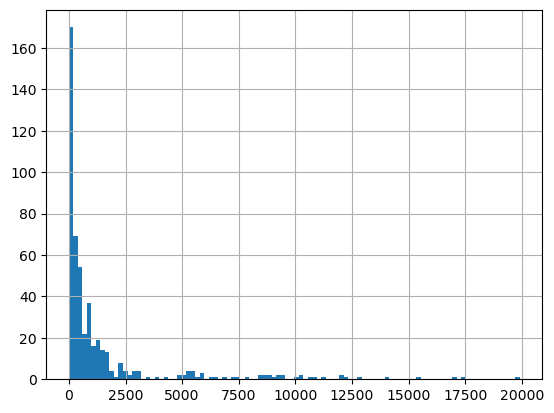

In [32]:
accra_spreads['total_spread'].hist(bins=100)

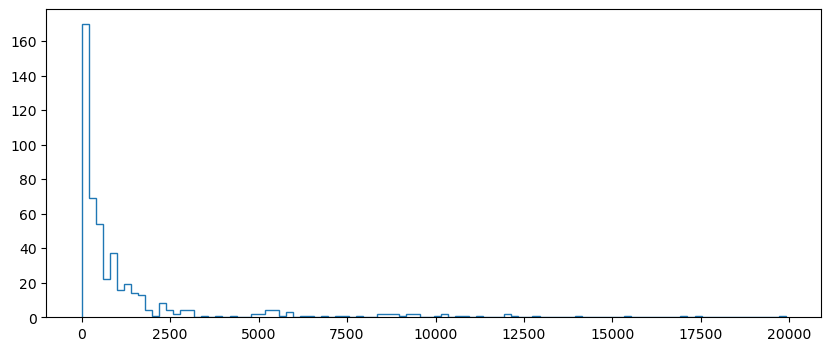

In [34]:
# https://matplotlib.org/stable/gallery/user_interfaces/svg_histogram_sgskip.html
counts, bins = np.histogram(accra_spreads['total_spread'].dropna(), bins=100)
plt.figure(figsize=(10,4))
plt.stairs(counts, bins)

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig("svgs/histograms/Spreads_Total_Accra.svg")

## Number of Moves

[100   9 202 206 211 214 215 152 142 134 225 406 516 311 321 343 342 340
 701 703 705 707 219 712 713 715 717 344]
['moves200' 'household' 'connections_ppl' 'connections_fin' 'future']


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
74,277933,277933.00,"('Madina', 'Adenta', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,100,0.000000,moves200,...,1,-3,Yes,Dangbe,Twi,No,No,No,NaN,NaN
75,277933,277933.06,"('Madina', 'Accra', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,9,0.000000,moves200,...,1,-3,Yes,Dangbe,Twi,No,No,No,NaN,NaN
76,278053,278053.00,"('Adenta', 'Adenta', 'Ghana')",1.967694,1.632161,-0.168796,5.704139,100,1.967694,moves200,...,1,-3,Yes,Dangme,Twi,No,Yes,No,NaN,NaN
77,278053,278053.06,"('Madina', 'Accra', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,9,1.967694,moves200,...,1,-3,Yes,Dangme,Twi,No,Yes,No,NaN,NaN
78,278067,278067.00,"('Adenta', 'Accra', 'Ghana')",1.967694,1.632161,-0.168796,5.704139,100,1.967694,moves200,...,3,-3,Yes,Ga,Twi,No,Yes,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,290686,290686.06,"('Madina', 'Accra', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,9,0.000000,moves200,...,0,Self-employed (run small business/income gener...,Yes,Akuapim,Akuapim Twi,No,No,Yes,1.967694,1.632161
3855,290687,290687.00,"('Madina', 'Madina', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,100,0.000000,moves200,...,1,Casual employment/temporary worker,Yes,Frafra,Hausa,No,Yes,No,24.298281,2.515624
3856,290687,290687.06,"('Madina', 'Accra', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,9,0.000000,moves200,...,1,Casual employment/temporary worker,Yes,Frafra,Hausa,No,Yes,No,24.298281,2.515624
3857,290689,290689.00,"('Madina', 'Madina', 'Ghana')",0.010000,0.000000,-0.167705,5.686496,100,0.000000,moves200,...,0,Working full-time (formal/informal sector),Yes,Akan,Fanti,No,No,Yes,15.117568,1.224832


,location
ID,
277933,2
278053,2
278067,2
278076,3
278077,3
...,...
290682,2
290683,3
290686,2


[  6 289 123  99  46  18]
[1. 2. 3. 4. 5. 6. 7.]


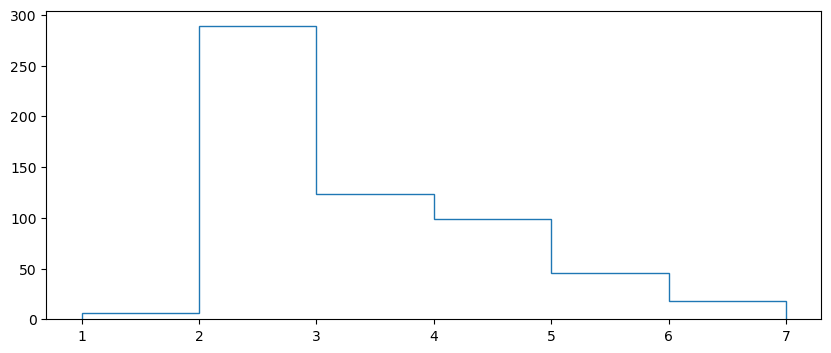

In [35]:
## Get Intermdediate Locations
print( accra_star['location_type'].unique() )
print( accra_star['grouping'].unique() )
display( accra_star[accra_star['grouping'].eq('moves200')] )

## Group
move_count = accra_star[accra_star['grouping'].eq('moves200')][['ID', 'location']].groupby('ID').count()
display( move_count )

## Histogram
counts, bins = np.histogram(move_count['location'].dropna(), bins=6)
plt.figure(figsize=(10,4))
plt.stairs(counts, bins)

print( counts )
print( bins )

## Export
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig("svgs/histograms/NumberofMoves_Accra.svg")

## Difference in Travelled and Origin-Destination Distances

,ID_ordered,ID,order
0,276785.00,276785,0.0
1,276785.01,276785,1.0
2,276785.02,276785,2.0
3,276785.06,276785,6.0
4,276788.00,276788,0.0
...,...,...,...
19914,297654.00,297654,0.0
19915,297655.00,297655,0.0
19916,297656.00,297656,0.0
19917,297660.00,297660,0.0


,dist
ID,
280725,81383.360783
297280,66953.494143
297609,66231.673381
296173,61650.145702
296845,58544.969675
...,...
283900,0.020000
285786,0.010000
296164,0.010000


,dist
ID,
276785,245.805142
276788,234.348325
276802,234.348325
276814,261.965414
276822,261.965414
...,...
297660,18.535022
297661,2.274880
297663,2773.816941


,dist_OD,dist_sum
ID,,
280725,81383.360783,1251.176710
297280,66953.494143,5103.449613
297609,66231.673381,3783.882448
296173,61650.145702,18.535022
296845,58544.969675,1057.252574
...,...,...
287160,0.050000,0.010000
289418,0.040000,0.010000
282661,0.030000,0.010000


[370 262 188 116  91  63  65  49  50  26  19  28  21  17  14  16  25  12
  20  10  13   8  10   7  10   8   7   9   5   4   1  12   6   7   8   5
   5   7   3   1   5   1   6   2   2   3   3   3   1   0   2   4   0   2
   2   1   0   1   0   0   0   0   0   0   2   1   0   0   0   0   0   1
   0   0   0   1   0   0   0   0   0   1   1   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   1]
[1.00000000e-02 8.13843508e+02 1.62767702e+03 2.44151052e+03
 3.25534403e+03 4.06917754e+03 4.88301105e+03 5.69684455e+03
 6.51067806e+03 7.32451157e+03 8.13834508e+03 8.95217859e+03
 9.76601209e+03 1.05798456e+04 1.13936791e+04 1.22075126e+04
 1.30213461e+04 1.38351796e+04 1.46490131e+04 1.54628466e+04
 1.62766802e+04 1.70905137e+04 1.79043472e+04 1.87181807e+04
 1.95320142e+04 2.03458477e+04 2.11596812e+04 2.19735147e+04
 2.27873482e+04 2.36011817e+04 2.44150152e+04 2.52288487e+04
 2.60426823e+04 2.68565158e+04 2.76703493e+04 2.84841828e+04
 2.92980163e+04 3.01118498e+04 3.09256833e+0

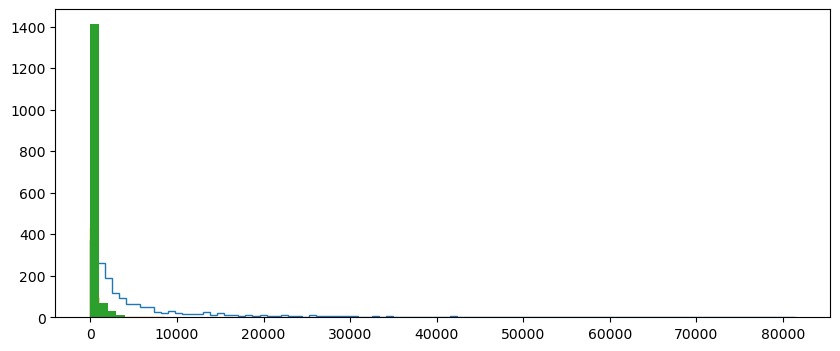

In [38]:
"""
DIFFERENCES ACCORDING TO STAR
"""
## Fix Datatype
star['order'] = (( star['ID_ordered'].astype('float') - star['ID'].astype('float') ) * 100 ) # .astype('int64')
display( star[['ID_ordered', 'ID', 'order']])

## Total travelled distance
sum_distances = star[star.order.lt(6)][['ID', 'dist']].groupby('ID').sum().sort_values(by='dist', ascending=False)
display( sum_distances )

## Origin distance
od_distances = star[star.location_type.eq(100)][['ID', 'dist']].drop_duplicates().groupby('ID').agg('max')
display( od_distances )

## Merge
distances = pd.merge( sum_distances, od_distances, how='inner', left_index=True, right_index=True, suffixes=['_OD', '_sum'])
display( distances ) 
plt.figure(figsize=(10,4))

counts1, bins1 = np.histogram(sum_distances['dist'].dropna(), bins=100)
counts2, bins2 = np.histogram(od_distances['dist'].dropna(), bins=100)
plt.stairs(counts1, bins1)
plt.stairs(counts2, bins2)
print( counts1 )
print( bins1 )
print( '\n' )
print( counts2 )
print( bins2 )

bin_size = 1000; min_edge = 0; max_edge = 40000
N = int(((max_edge-min_edge)/bin_size)); Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

plt.hist(od_distances['dist'].dropna(), bins=bin_list)
# plt.hist(sum_distances['dist'].dropna(), bins=bin_list)

plt.show()

x = distances['dist_OD']
y = distances['dist_sum']

In [40]:
"""
DIFFERENCES ACCORDING TO TRAJECTORIES
"""

## Columns from Trajectory with Distance
distcompare = traj[['respondentID', 'location_type', 'location_name', 'distance_from_origin_location_km', 'distance_from_previous_location_km']]
distcompare['order'] = (distcompare.index - distcompare['respondentID'])*100
display( distcompare )

## Travelled Distance
sum_distances = distcompare[distcompare.order.lt(6)][['respondentID', 'distance_from_previous_location_km']].groupby('respondentID').sum().sort_values(by='distance_from_previous_location_km', ascending=False)
display( sum_distances )

## Origin Destination Distance
od_distances = distcompare[distcompare.location_type.eq('current location')][['respondentID', 'distance_from_origin_location_km']].groupby('respondentID').agg('max')
display( od_distances )

## MERGE
distances = pd.merge( sum_distances, od_distances, how='inner', left_index=True, right_index=True, suffixes=['_OD', '_sum'])
display( distances )

distances = distances.rename(columns={'distance_from_previous_location_km':'sum_dist_km','distance_from_origin_location_km':'OD_dist_km'})
distances['difference_km'] = distances['sum_dist_km'] - distances['OD_dist_km']

# RANKS
distances['sum_dist_rank'] = distances['sum_dist_km'].rank(pct=True)
distances['OD_dist_rank'] = distances['OD_dist_km'].rank(pct=True)
distances['difference_rank'] = distances['sum_dist_rank'] - distances['OD_dist_rank']

display( distances )

,respondentID,location_type,location_name,distance_from_origin_location_km,distance_from_previous_location_km,order
IDo,,,,,,
276785.00,276785,origin,"('Kawango', 'Kisumu', 'Kenya')",0.000000,0.000000,0.0
276785.01,276785,1st migration location,"('Manyatta', 'Kisumu', 'Kenya')",280.512936,280.512936,1.0
276785.02,276785,2nd migration location,"('Kawangware', 'Nairobi', 'Kenya')",549.265452,309.229771,2.0
276785.03,276785,3rd migration location,NaN,NaN,NaN,3.0
276785.04,276785,4th migration location,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...
297668.06,297668,current location,"('Berea', 'Johannesburg', 'South Africa')",1254.648626,0.000000,6.0
297668.07,297668,aspiration 2-6 months,NaN,NaN,NaN,7.0
297668.08,297668,planned move 2 yrs,NaN,NaN,NaN,8.0


,distance_from_previous_location_km
respondentID,
297279,34058.324838
296170,32205.631228
297633,31751.117407
297277,31552.034589
295518,29856.658654
...,...
286735,0.000000
286669,0.000000
286668,0.000000


,distance_from_origin_location_km
respondentID,
276785,549.265452
276802,71.630505
276814,6810.632065
276822,566.723692
276931,257.198700
...,...
297657,1509.508024
297663,0.000000
297666,372.285757


,distance_from_previous_location_km,distance_from_origin_location_km
respondentID,,
297279,34058.324838,2774.365893
296170,32205.631228,949.585144
297633,31751.117407,495.958419
297277,31552.034589,303.915245
295518,29856.658654,1608.197364
...,...,...
286735,0.000000,0.000000
286669,0.000000,0.000000
286668,0.000000,0.000000


,sum_dist_km,OD_dist_km,difference_km,sum_dist_rank,OD_dist_rank,difference_rank
respondentID,,,,,,
297279,34058.324838,2774.365893,31283.958946,1.000000,0.961610,0.038390
296170,32205.631228,949.585144,31256.046085,0.999064,0.891386,0.107678
297633,31751.117407,495.958419,31255.158988,0.998127,0.759363,0.238764
297277,31552.034589,303.915245,31248.119344,0.997191,0.632022,0.365169
295518,29856.658654,1608.197364,28248.461290,0.996255,0.941011,0.055243
...,...,...,...,...,...,...
286735,0.000000,0.000000,0.000000,0.143727,0.146536,-0.002809
286669,0.000000,0.000000,0.000000,0.143727,0.146536,-0.002809
286668,0.000000,0.000000,0.000000,0.143727,0.146536,-0.002809


[ 80  66 129  74  52  97  78  38 318   9   6  11   4   5   3   6   3   5
   1   5   5   0   3   2   2   3   1   2   1   1   0   4   2   0   0   2
   3   3   1   1   1   1   3   1   1   1   2   0   1   2   3   0   2   1
   0   1   0   1   2   2   3   2   2   0   1   0   0   0   0   0   0   2
   1   0   0   0   2   1   0   0   1   0   0   0   0   0   0   0   0   0
   0   0   0   1   0   0   0   0   0   1]
[-0.06086142 -0.05376873 -0.04667603 -0.03958333 -0.03249064 -0.02539794
 -0.01830524 -0.01121255 -0.00411985  0.00297285  0.01006554  0.01715824
  0.02425094  0.03134363  0.03843633  0.04552903  0.05262172  0.05971442
  0.06680712  0.07389981  0.08099251  0.08808521  0.0951779   0.1022706
  0.1093633   0.11645599  0.12354869  0.13064139  0.13773408  0.14482678
  0.15191948  0.15901217  0.16610487  0.17319757  0.18029026  0.18738296
  0.19447566  0.20156835  0.20866105  0.21575375  0.22284644  0.22993914
  0.23703184  0.24412453  0.25121723  0.25830993  0.26540262  0.27249532
  0.279588

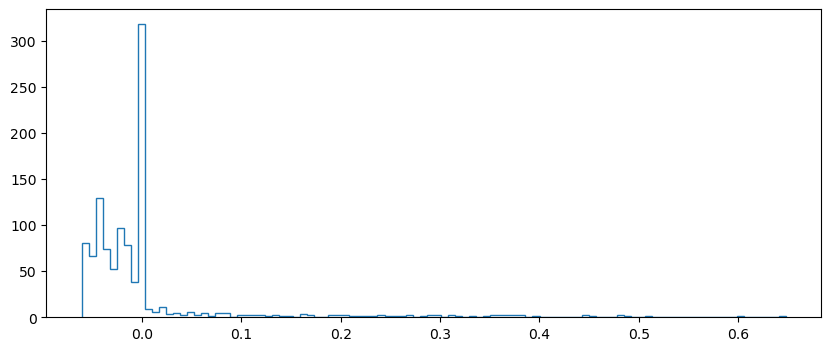

In [41]:
"""
SIMPLE VISUALIZATION
"""

fn = 'OD v Sum Difference'
s = distances['difference_rank']
b = 100

# s = s.dropna()
# s = [x for x in s if x != np.nan]
counts, bins = np.histogram(s.dropna(), bins=b)
plt.figure(figsize=(10,4))
plt.stairs(counts, bins)

print( counts )
print( bins )

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig("{} {}.svg".format(datenow, fn))

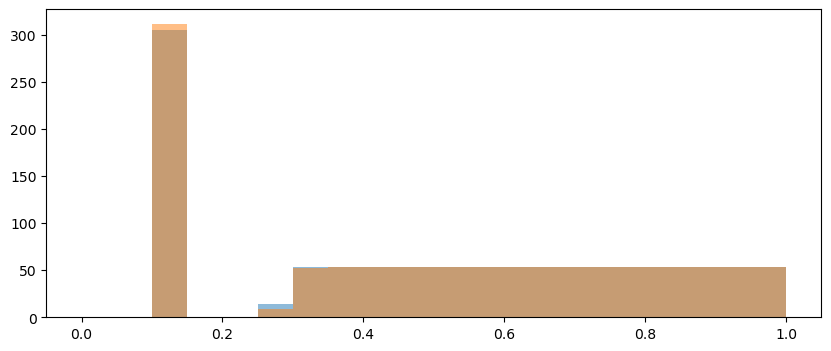

In [44]:
plt.figure(figsize=(10,4))

# counts1, bins1 = np.histogram(distances['sum_dist_rank'].dropna(), bins=100)
# counts2, bins2 = np.histogram(distances['OD_dist_rank'].dropna(), bins=100)
# plt.stairs(counts1, bins1)
# plt.stairs(counts2, bins2)
# print( counts1 )
# print( bins1 )
# print( '\n' )
# print( counts2 )
# print( bins2 )

bin_size = 0.05; min_edge = 0; max_edge = 1
N = int(((max_edge-min_edge)/bin_size)); Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

plt.hist(distances['sum_dist_rank'].dropna(), bins=bin_list, alpha = 0.5)
plt.hist(distances['OD_dist_rank'].dropna(), bins=bin_list, alpha = 0.5)

plt.show()

## Scatter Plot of Travelled Against Orgin Distance

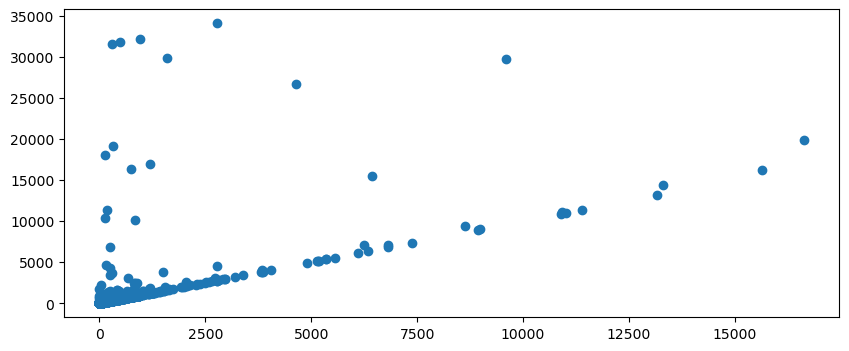

In [47]:
plt.figure(figsize=(10,4))

x = distances['OD_dist_km']
y = distances['sum_dist_km']
plt.scatter( x , y )

## Scatterplot with Histograms

In [49]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html

x = distcompare['distance_from_origin_location_km']
y = distcompare['distance_from_previous_location_km']

# def scatter_hist(x, y, ax, ax_histx, ax_histy):
#     # no labels
#     ax_histx.tick_params(axis="x", labelbottom=False)
#     ax_histy.tick_params(axis="y", labelleft=False)

#     # the scatter plot:
#     ax.scatter(x, y)

#     # now determine nice limits by hand:
#     binwidth = 0.25
#     xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
#     lim = (int(xymax/binwidth) + 1) * binwidth

#     bins = np.arange(-lim, lim + binwidth, binwidth)
#     ax_histx.hist(x, bins=bins)
#     ax_histy.hist(y, bins=bins, orientation='horizontal')
    
# # Start with a square Figure.
# fig = plt.figure(figsize=(6, 6))
# # Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# # the size of the marginal axes and the main axes in both directions.
# # Also adjust the subplot parameters for a square plot.
# gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
#                       left=0.1, right=0.9, bottom=0.1, top=0.9,
#                       wspace=0.05, hspace=0.05)
# # Create the Axes.
# ax = fig.add_subplot(gs[1, 0])
# ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
# ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# # Draw the scatter plot and marginals.
# scatter_hist(x, y, ax, ax_histx, ax_histy)

# plt.show()

# plt.rcParams['svg.fonttype'] = 'none'
## plt.savefig("{} Distances Accra.svg".format(datenow))